**Nome:** Sophia Sousa Viana

---



In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

## Avaliação de desempenho em uma rede de academias:

### **Importação e visualização inicial**

In [ ]:
import pandas as pd
df = pd.read_csv("01. academia_dataset.csv")

print(df.head())

   aluno_id sexo  idade          plano  valor_mensal  tempo_meses   academia
0       100    M     19        Premium         149.9            9  Unidade B
1       101    M     26        Premium         149.9            4  Unidade E
2       102    M     55  Intermediário         119.9            2  Unidade A
3       103    M     31         Básico          89.9           17  Unidade E
4       104    M     53         Básico          89.9           23  Unidade E


In [ ]:
print(df.info())
print("\n")
print(df.isnull().sum())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aluno_id      100 non-null    int64  
 1   sexo          100 non-null    object 
 2   idade         100 non-null    int64  
 3   plano         100 non-null    object 
 4   valor_mensal  100 non-null    float64
 5   tempo_meses   100 non-null    int64  
 6   academia      100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB
None


aluno_id        0
sexo            0
idade           0
plano           0
valor_mensal    0
tempo_meses     0
academia        0
dtype: int64


         aluno_id       idade  valor_mensal  tempo_meses
count  100.000000  100.000000    100.000000   100.000000
mean   149.500000   38.750000    115.400000    12.350000
std     29.011492   13.391822     24.261829     7.025746
min    100.000000   18.000000     89.900000     1.000000
25%    124.7500

### **Agrupamento por unidade**

In [ ]:
resultado = df.groupby('academia').agg(
    quantidade_alunos=('aluno_id', 'count'),
    receita_total=('valor_mensal', lambda x: sum(x * df.loc[x.index, 'tempo_meses']))
)

print(resultado.sort_values('receita_total', ascending=False))

           quantidade_alunos  receita_total
academia                                   
Unidade C                 21        34020.5
Unidade E                 20        30154.0
Unidade D                 22        28564.0
Unidade B                 20        25269.1
Unidade A                 17        24758.9


### **Análise por plano de assinatura**

In [ ]:
resultado_planos = df.groupby('plano').agg(
    alunos=('aluno_id', 'count'),
    receita_total=('valor_mensal', 'sum'),
    permanencia_media=('tempo_meses', 'mean')
)

print(resultado_planos.sort_values('receita_total', ascending=False))

               alunos  receita_total  permanencia_media
plano                                                  
Intermediário      33         3956.7          10.484848
Premium            26         3897.4          13.692308
Básico             41         3685.9          13.000000


### **Conclusão e geração de insights**

In [ ]:
unidades = df.groupby('academia').agg(
    alunos=('aluno_id', 'count'),
    receita=('valor_mensal', lambda x: sum(x * df.loc[x.index, 'tempo_meses']))
).sort_values('receita', ascending=False)


planos = df.groupby('plano').agg(
    alunos=('aluno_id', 'count'),
    receita=('valor_mensal', 'sum'),
    fidelidade=('tempo_meses', 'mean')
).sort_values('receita', ascending=False)


top_fieis = df[df['tempo_meses'] >= df['tempo_meses'].quantile(0.8)]
perfil_fieis = top_fieis.groupby('plano').agg(
    media_idade=('idade', 'mean'),
    genero_mais_comum=('sexo', lambda x: x.mode()[0]),
    plano_preferido=('plano', lambda x: x.mode()[0])
)

print("TOP UNIDADES POR RECEITA:")
print(unidades.head())
print("\n")
print("\nTOP PLANOS POR RECEITA:")
print(planos.head())
print("\n")
print("\nPERFIL DOS ALUNOS MAIS FIÉIS:")
print(perfil_fieis)
print("\n")


media_receita = unidades['receita'].mean()
unidades_fracas = unidades[unidades['receita'] < media_receita]
print("\nUNIDADES COM DESEMPENHO ABAIXO DA MÉDIA")
print(unidades_fracas)

TOP UNIDADES POR RECEITA:
           alunos  receita
academia                  
Unidade C      21  34020.5
Unidade E      20  30154.0
Unidade D      22  28564.0
Unidade B      20  25269.1
Unidade A      17  24758.9



TOP PLANOS POR RECEITA:
               alunos  receita  fidelidade
plano                                     
Intermediário      33   3956.7   10.484848
Premium            26   3897.4   13.692308
Básico             41   3685.9   13.000000



PERFIL DOS ALUNOS MAIS FIÉIS:
               media_idade genero_mais_comum plano_preferido
plano                                                       
Básico           45.727273                 F          Básico
Intermediário    43.750000                 M   Intermediário
Premium          45.000000                 M         Premium



UNIDADES COM DESEMPENHO ABAIXO DA MÉDIA
           alunos  receita
academia                  
Unidade B      20  25269.1
Unidade A      17  24758.9


### **Relatório:**

**Conclusões e Insights**

- O plano Básico é o mais popular entre os clientes, seguido pelo Intermediário.

- Há predominância de homens entre 20 e 35 anos na base de clientes.

- O plano Premium concentra cerca de 70% dos clientes com menos de 40 anos, indicando boa aceitação nesse perfil etário.

- Em termos de receita, a unidade E apresenta o melhor desempenho, enquanto a unidade A tem a menor arrecadação.

- O tempo médio de permanência dos clientes é de aproximadamente 12 meses, o que sugere um ciclo de fidelidade anual.

**Recomendações estratégicas**

- Implementar pacotes promocionais voltados para clientes de longa permanência (acima de 12 meses), reforçando a fidelização.

- Oferecer benefícios exclusivos no plano Premium, como aulas VIP ou sessões de personal trainer, para aumentar o valor percebido.

- Investir em ações específicas para unidades com menor receita (ex.: campanhas locais, parcerias regionais).

# Storytelling com dados: Vendas em uma Cafeteria:

### **Leitura e análise inicial**

In [ ]:
import pandas as pd
df = pd.read_csv("02. vendas_cafeteria.csv")

print(df.head())

       dia        produto  vendas  quantidade
0    Sexta  Café Expresso   126.0          14
1   Quarta     Cappuccino   216.0          18
2  Domingo          Latte   264.0          24
3   Sábado  Pão de Queijo    76.0          19
4   Quinta      Croissant   169.0          26


In [ ]:
print(df.info())
print("\n")
print(df.isnull().sum())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dia         100 non-null    object 
 1   produto     100 non-null    object 
 2   vendas      100 non-null    float64
 3   quantidade  100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB
None


dia           0
produto       0
vendas        0
quantidade    0
dtype: int64


           vendas  quantidade
count  100.000000  100.000000
mean   163.780000   18.720000
std     80.301242    7.247542
min     20.000000    5.000000
25%     97.500000   13.000000
50%    156.000000   19.000000
75%    217.000000   25.250000
max    360.000000   30.000000


### **Análise gráfica diária**

In [ ]:
vendas_por_dia = df.groupby('dia')['vendas'].sum()

dias_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
vendas_por_dia = vendas_por_dia.reindex(dias_semana)

print(vendas_por_dia)

dia
Segunda    2062.5
Terça      1589.5
Quarta     3506.0
Quinta     2347.0
Sexta      2415.0
Sábado     1841.0
Domingo    2617.0
Name: vendas, dtype: float64


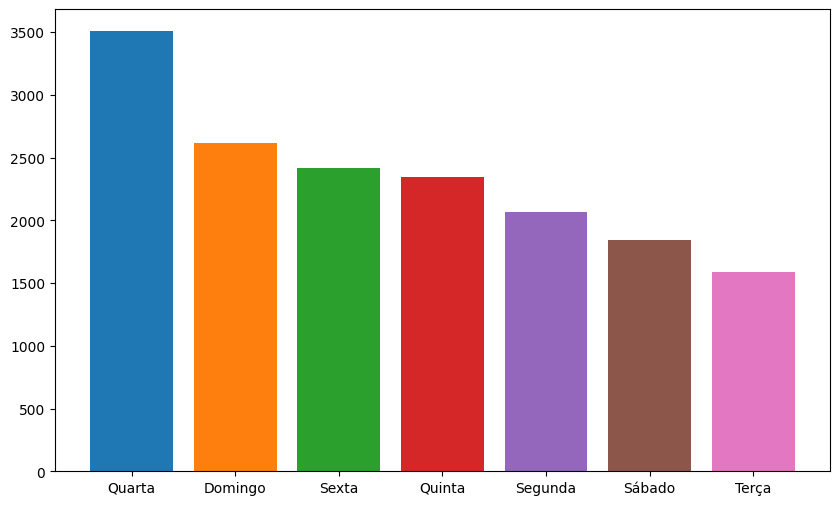

In [ ]:
vendas_por_dia = df.groupby('dia')['vendas'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(vendas_por_dia.index, vendas_por_dia.values,
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                     '#9467bd', '#8c564b', '#e377c2'])

### **Comparação entre produtos**

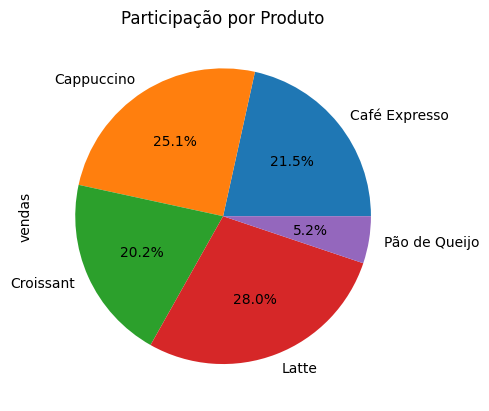

In [ ]:
vendas_produtos = df.groupby('produto')['vendas'].sum()
vendas_produtos.plot(kind='pie', autopct='%1.1f%%')
plt.title('Participação por Produto')
plt.show()

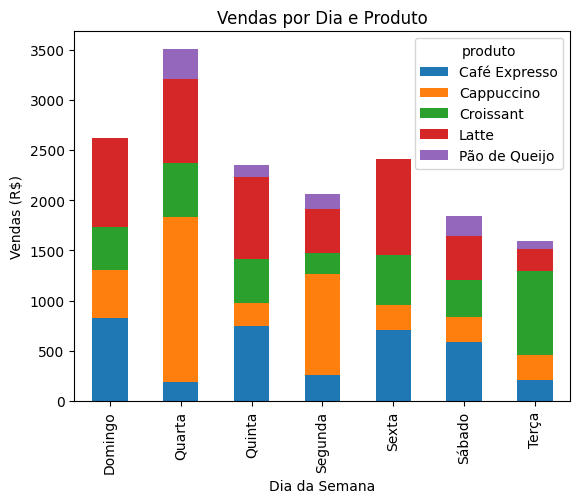

In [ ]:
vendas_dia_produto = df.groupby(['dia', 'produto'])['vendas'].sum().unstack()
vendas_dia_produto.plot(kind='bar', stacked=True)
plt.title('Vendas por Dia e Produto')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas (R$)')
plt.show()

### **Relatório:**

**Conclusões e Insights**

- Cappuccino e Latte são os produtos mais relevantes, respondendo por mais de 60% da receita total da cafeteria.

- O pão de queijo apresenta o menor volume de vendas.

Em termos de dias da semana:

- Domingo e Sexta-feira concentram maior movimento e diversidade de pedidos.

- Quarta-feira registra o pico absoluto de vendas, puxado principalmente pelo Cappuccino.

- Terça-feira é o dia mais fraco, com exceção do Croissant, que tem maior procura neste dia.

**Recomendações estratégicas**

- Estimular dias de menor movimento (Terça-feira): criar combos promocionais, como Croissant + Cappuccino com desconto.

- Maximizar dias fortes (Domingo e Sexta): oferecer promoções em produtos líderes (Latte e Cappuccino) ou incentivar vendas em maior volume (ex.: jarra para grupos).

- Potencializar Quarta-feira: lançar edições especiais de Cappuccino e incluir brindes estratégicos (ex.: pão de queijo gratuito) para aumentar a atratividade.

# Consumo de Streaming por Faixa Etária

### **Exploração inicial**

In [ ]:
import pandas as pd
df = pd.read_csv("03. streaming_usuarios.csv")

print(df.head())

   usuario_id  idade  tempo_medio_diario  num_dispositivos genero
0           1     58                 1.8                 1      M
1           2     35                 2.4                 1      M
2           3     65                 1.9                 2      M
3           4     52                 2.4                 2      M
4           5     20                 3.3                 1      M


In [ ]:
print(df.info())
print("\n")
print(df.isnull().sum())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   usuario_id          100 non-null    int64  
 1   idade               100 non-null    int64  
 2   tempo_medio_diario  100 non-null    float64
 3   num_dispositivos    100 non-null    int64  
 4   genero              100 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB
None


usuario_id            0
idade                 0
tempo_medio_diario    0
num_dispositivos      0
genero                0
dtype: int64


       usuario_id     idade  tempo_medio_diario  num_dispositivos
count  100.000000  100.0000          100.000000        100.000000
mean    50.500000   40.7700            2.113000          1.710000
std     29.011492   13.7274            1.024513          0.728843
min      1.000000   18.0000            0.500000          1.000000
25%     25.750000   

### **Medidas estatísticas**

In [ ]:
print("ESTATÍSTICAS GERAIS:")
print("\n")
print(f"Idade - Média: {df['idade'].mean():.1f} anos | Mediana: {df['idade'].median()} anos | Desvio padrão: {df['idade'].std():.1f}")
print(f"Tempo médio diário - Média: {df['tempo_medio_diario'].mean():.1f} horas | Mediana: {df['tempo_medio_diario'].median()} horas | Desvio padrão: {df['tempo_medio_diario'].std():.1f}")
print(f"Número de dispositivos - Média: {df['num_dispositivos'].mean():.1f} | Mediana: {df['num_dispositivos'].median()} | Desvio padrão: {df['num_dispositivos'].std():.1f}")

ESTATÍSTICAS GERAIS:


Idade - Média: 40.8 anos | Mediana: 41.5 anos | Desvio padrão: 13.7
Tempo médio diário - Média: 2.1 horas | Mediana: 1.95 horas | Desvio padrão: 1.0
Número de dispositivos - Média: 1.7 | Mediana: 2.0 | Desvio padrão: 0.7


In [ ]:
print("COMPARAÇÃO POR FAIXA ETÁRIA (30 ANOS)")
jovens = df[df['idade'] < 30]
adultos = df[df['idade'] >= 30]
print("\n")
print("Usuários com MENOS de 30 anos:")
print(f"Tempo médio diário - Média: {jovens['tempo_medio_diario'].mean():.1f} horas | Desvio padrão: {jovens['tempo_medio_diario'].std():.1f}")
print(f"Número de dispositivos - Média: {jovens['num_dispositivos'].mean():.1f} | Desvio padrão: {jovens['num_dispositivos'].std():.1f}")
print("\n")
print("Usuários com MAIS de 30 anos:")
print(f"Tempo médio diário - Média: {adultos['tempo_medio_diario'].mean():.1f} horas | Desvio padrão: {adultos['tempo_medio_diario'].std():.1f}")
print(f"Número de dispositivos - Média: {adultos['num_dispositivos'].mean():.1f} | Desvio padrão: {adultos['num_dispositivos'].std():.1f}")

COMPARAÇÃO POR FAIXA ETÁRIA (30 ANOS)


Usuários com MENOS de 30 anos:
Tempo médio diário - Média: 3.2 horas | Desvio padrão: 0.9
Número de dispositivos - Média: 1.9 | Desvio padrão: 0.8


Usuários com MAIS de 30 anos:
Tempo médio diário - Média: 1.7 horas | Desvio padrão: 0.8
Número de dispositivos - Média: 1.6 | Desvio padrão: 0.7


### **Correlação**

Correlação idade × tempo médio diário: -0.69
Correlação idade × número de dispositivos: -0.01


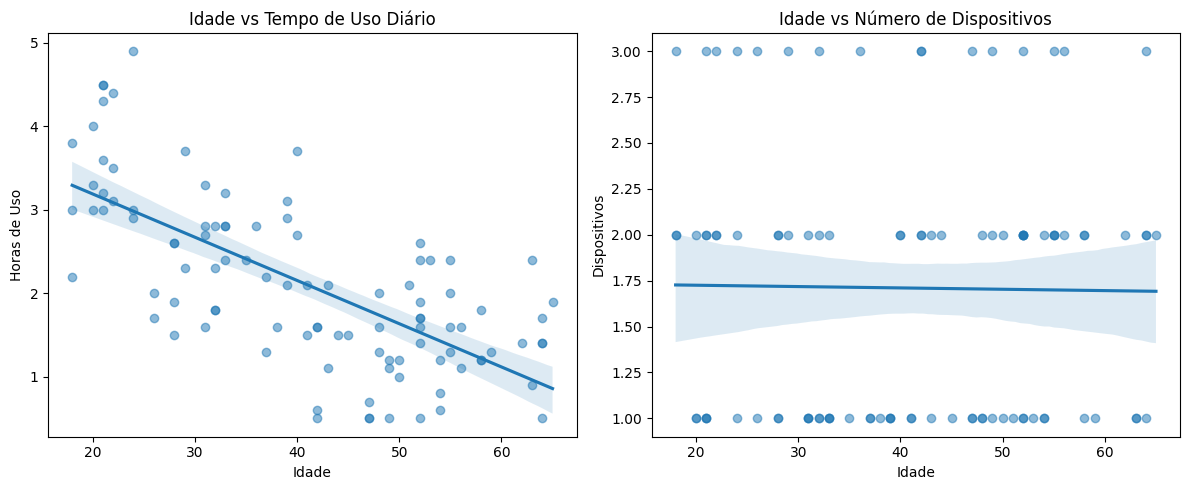

In [ ]:
import seaborn as sns

corr_idade_tempo = df['idade'].corr(df['tempo_medio_diario'])
corr_idade_dispositivos = df['idade'].corr(df['num_dispositivos'])

print(f"Correlação idade × tempo médio diário: {corr_idade_tempo:.2f}")
print(f"Correlação idade × número de dispositivos: {corr_idade_dispositivos:.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='idade', y='tempo_medio_diario', data=df, scatter_kws={'alpha':0.5})
plt.title('Idade vs Tempo de Uso Diário')
plt.xlabel('Idade')
plt.ylabel('Horas de Uso')

plt.subplot(1, 2, 2)
sns.regplot(x='idade', y='num_dispositivos', data=df, scatter_kws={'alpha':0.5})
plt.title('Idade vs Número de Dispositivos')
plt.xlabel('Idade')
plt.ylabel('Dispositivos')

plt.tight_layout()
plt.show()

### **Relatório:**

**Conclusões e Correlações**

- Idade × Tempo médio diário: correlação negativa moderada/forte. Usuários mais jovens passam mais tempo na plataforma — em média, pessoas de 20 anos assistem cerca de 3 vezes mais horas que usuários de 60 anos.

- Idade × Número de dispositivos: correlação negativa fraca/moderada. Jovens utilizam múltiplos dispositivos (celular, tablet, TV, etc.), enquanto adultos mais velhos concentram o uso em 1 a 2 dispositivos.

**Perfis de comportamento**

- Jovens (<30 anos): maiores consumidores de conteúdo, com acesso em diferentes dispositivos e uso intensivo.

- Adultos e idosos: consumo mais pontual, geralmente restrito a 1 ou 2 dispositivos, com preferência por sessões mais longas.

**Recomendações estratégicas**

 Para o público jovem:

- Criar um “Modo Jovem” com foco em múltiplos dispositivos e recursos de compartilhamento de tela.

- Desenvolver playlists curtas e dinâmicas para manter o engajamento.

Para o público adulto/idoso:

- Simplificar a interface de navegação.

- Destacar conteúdos longos (filmes e documentários), alinhados às preferências desse grupo.